In [48]:
import pandas as pd
import matplotlib.pyplot as plt 


In [49]:
global data
data = pd.read_csv('data/training.csv')
data

,finishing_position,horse_number,horse_name,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,length_behind_winner,...,finish_time,win_odds,running_position_5,running_position_6,race_id,recent_6_runs,recent_ave_rank,jockey_ave_rank,trainer_ave_rank,race_distance
0,1,1.0,DOUBLE DRAGON,K019,B Prebble,D Cruz,133,1032,1,-,...,1.22.33,3.8,NaN,NaN,2014-001,NaN,7.00,7,7,1400
1,2,2.0,PLAIN BLUE BANNER,S070,D Whyte,D E Ferraris,133,1075,13,2,...,1.22.65,8.0,NaN,NaN,2014-001,NaN,7.00,7,7,1400
2,3,10.0,GOLDWEAVER,P072,Y T Cheng,Y S Tsui,121,1065,3,2,...,1.22.66,5.7,NaN,NaN,2014-001,NaN,7.00,7,7,1400
3,4,3.0,SUPREME PROFIT,P230,J Moreira,C S Shum,132,1222,2,2,...,1.22.66,6.1,NaN,NaN,2014-001,NaN,7.00,7,7,1400
4,5,7.0,THE ONLY KID,H173,Z Purton,K W Lui,125,1136,9,4-1/4,...,1.23.02,6.1,NaN,NaN,2014-001,NaN,7.00,7,7,1400
5,6,9.0,WINNING ADVANTAGE,N359,A Suborics,A T Millard,123,1100,11,5-1/2,...,1.23.20,24.0,NaN,NaN,2014-001,NaN,7.00,7,7,1400
6,7,13.0,CARE FREE ELEGANCE,P340,C Y Ho,K L Man,115,1053,12,5-1/2,...,1.23.22,99.0,NaN,NaN,2014-001,NaN,7.00,7,7,1400
7,8,4.0,COOL PAL,S035,H W Lai,L Ho,129,1203,8,5-3/4,...,1.23.25,21.0,NaN,NaN,2014-001,NaN,7.00,7,7,1400
8,9,6.0,TAI PO FORTUNE,P081,K Teetan,T P Yung,127,1073,6,6-1/4,...,1.23.33,10.0,NaN,NaN,2014-001,NaN,7.00,7,7,1400
9,10,11.0,SUPER HORSE,L308,T H So,C W Chang,119,1137,7,6-3/4,...,1.23.41,27.0,NaN,NaN,2014-001,NaN,7.00,7,7,1400


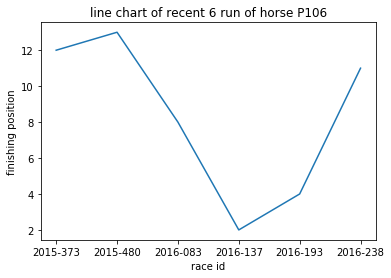

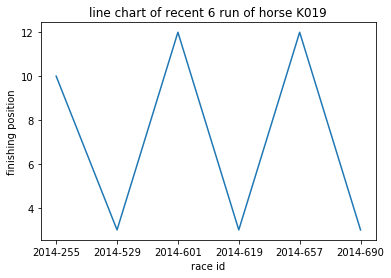

In [50]:
# 6.1
def line_chart(horse_id):
    horse_index = []
    for i, k in enumerate(data['horse_id']):
        if k == horse_id:
            horse_index.append(i)
    horse_finish = data.iloc[horse_index][['finishing_position', 'race_id']]
    
    plt.plot( horse_finish.race_id[-7:-1],horse_finish.finishing_position[-7:-1])
    plt.xlabel('race id')
    plt.ylabel('finishing position')
    plt.title('line chart of recent 6 run of horse '+horse_id)
    plt.show()
    

line_chart('P106')
line_chart('K019')

In [117]:
# 6.2

horse_plot_info = {'name':[], 'win_num':[], 'win_rate':[]}
jockey_plot_info = {'name':[], 'win_num':[], 'win_rate':[]}

horse_list = list(set(data['horse_name']))
horse_dict = {}
for name in horse_list:
    name_index = []
    for i, k in enumerate(data['horse_name']):
        if k == name:
            name_index.append(i)
    record = data.iloc[name_index][['finishing_position']]
    win_num = sum([1 for row in record.itertuples() if int(row.finishing_position) == 1])
    win_rate = win_num/len(record)
    horse_plot_info['name'].append(name)
    horse_plot_info['win_num'].append(win_num)
    horse_plot_info['win_rate'].append(win_rate)
    
    
    
    
jockey_list = list(set(data['jockey']))
jockey_dict = {}
for name in jockey_list:
    name_index = []
    for i, k in enumerate(data['jockey']):
        if k == name:
            name_index.append(i)
    record = data.iloc[name_index][['finishing_position']]
    win_num = sum([1 for row in record.itertuples() if int(row.finishing_position) == 1])
    jockey_dict[name] = {'win_num': win_num, 'win_rate': win_num/len(record)}
    win_rate = win_num/len(record)
    jockey_plot_info['name'].append(name)
    jockey_plot_info['win_num'].append(win_num)
    jockey_plot_info['win_rate'].append(win_rate)
    

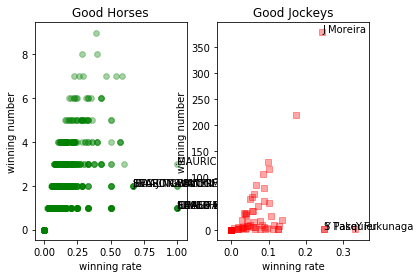

In [123]:
# hyper parameter
horse_threshold = 0.65
jockey_threshold = 0.18

plt.subplot(1,2,1)
plt.scatter(horse_plot_info['win_rate'], horse_plot_info['win_num'], marker='8', c='g', alpha=0.35) 
plt.xlabel('winning rate')
plt.ylabel('winning number')
plt.title('Good Horses')
for i, name in enumerate(horse_plot_info['name']):
    if horse_plot_info['win_rate'][i] >= horse_threshold:
        plt.annotate(name, (horse_plot_info['win_rate'][i], horse_plot_info['win_num'][i]))
    
plt.subplot(1,2,2)
plt.scatter(jockey_plot_info['win_rate'], jockey_plot_info['win_num'], marker='s', c='r', alpha=0.35) 
plt.xlabel('winning rate')
plt.ylabel('winning number')
plt.title('Good Jockeys')
for i, name in enumerate(jockey_plot_info['name']):
    if jockey_plot_info['win_rate'][i] >= jockey_threshold:
        plt.annotate(name,( jockey_plot_info['win_rate'][i], jockey_plot_info['win_num'][i]))

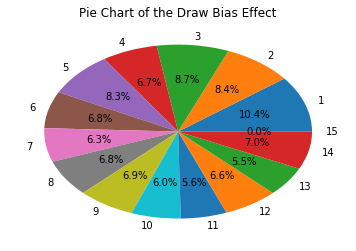

In [137]:
# 6.3 pie chart

draw_list = np.unique(data.draw)
draw_win_rate = []
for draw in draw_list:
    draw_index = []
    for i, k in enumerate(data['draw']):
        if k == draw:
            draw_index.append(i)
    record = data.iloc[draw_index][['finishing_position']]
    win_num = sum([1 for row in record.itertuples() if int(row.finishing_position) == 1])
    draw_win_rate.append(win_num/len(record))
    
    
plt.pie(draw_win_rate, labels=draw_list, autopct='%1.1f%%')
plt.title('Pie Chart of the Draw Bias Effect')
plt.show()



In [66]:
# 6.4 bar chart
# Here we use random forest
# First prepare training data

import numpy as np
data = pd.read_csv('data/training.csv')
m_data = data.shape[0]
df_train, df_test = data[0:int(0.7*m_data)], data[int(0.7*m_data)+1:m_data]
df_test = df_test.reset_index(drop=True)

df = pd.read_csv('data/race-result-horse.csv')
m, n = np.shape(df)
m_train, _ = np.shape(df_train)
m_test, _ = np.shape(df_test)

#produce dicts for horse,jockey,trainer
horse=list()
jockey=list()
trainer=list()
for i in range(len(df)):
    if df.horse_name[i] not in horse:
        horse.append(df.horse_name[i])
    if df.jockey[i] not in jockey:
        jockey.append(df.jockey[i])
    if df.trainer[i] not in jockey:
        trainer.append(df.trainer[i])
train_horse=np.zeros((m_train,1))
train_jockey=np.zeros((m_train,1))
train_trainer=np.zeros((m_train,1))

# prepare training data
for i in range(m_train):
    train_horse[i,0] = horse.index(df_train.horse_name[i])
    train_jockey[i,0] = jockey.index(df_train.jockey[i])
    train_trainer[i,0] = trainer.index(df_train.trainer[i])
actual_weight = df_train.actual_weight.reshape((m_train,1))
declared_weight = df_train.declared_horse_weight.reshape((m_train,1))
draw = df_train.draw.reshape((m_train,1))
win_odds = df_train.win_odds.reshape((m_train,1))
race_distance = df_train.race_distance.reshape((m_train,1))

# we use horse, jockey, trainer, actual weight, declared weight, win odds, race distance as independent variables
X_train = np.hstack((train_horse, train_jockey, train_trainer, actual_weight,
                     declared_weight, draw, win_odds, race_distance)) 
y_train = df_train.finishing_position


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:36: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:37: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:38: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:40: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [100]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

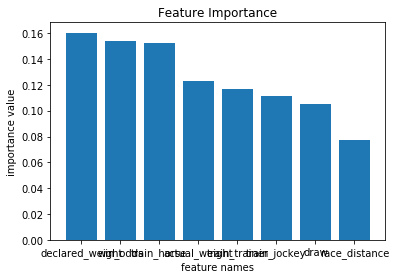

In [149]:
features = ['train_horse', 'train_jockey', 'train_trainer', 'actual_weight',
                     'declared_weight', 'draw', 'win_odds', 'race_distance']
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

features_reorder = [features[i] for i in indices]

index = range(len(features))

plt.bar(index, importances[indices], align='center')
plt.xlabel('feature names')
plt.ylabel('importance value')
plt.title('Feature Importance')
plt.xticks(index, features_reorder)
plt.show()

In [95]:
# 6.5 visualize SVM

from collections import Counter
from sklearn.svm import SVC

svm_train = data[['recent_ave_rank', 'jockey_ave_rank']]
svm_train = np.array(pd.DataFrame(svm_train, dtype=np.float))
result = data.finishing_position
cnt = Counter(data.race_id)
svm_train_label = [int(result[i] <= np.floor(cnt[data.race_id[i]]/2)) for i in range(len(result))]

svc = SVC(kernel='linear')
svc.fit(svm_train, svm_train_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

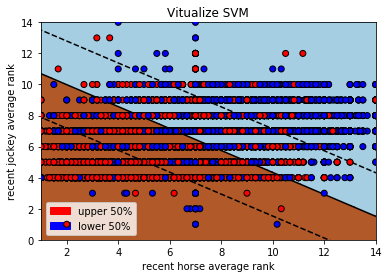

In [150]:
import matplotlib.patches as mpatches

color_label = [(l==1)*'red'+(l==0)*'blue' for l in svm_train_label]
plt.scatter(svm_train[:, 0], svm_train[:, 1], c=color_label, zorder=10, edgecolor='k')
w = svc.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(0,15)
yy = a*xx - (svc.intercept_[0])/w[1]

margin = 1/np.sqrt(np.sum(svc.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a**2) * margin
yy_up = yy + np.sqrt(1 + a**2) * margin

plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

x_min = 1
x_max = 14
y_min = 0
y_max = 14

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = svc.predict(np.c_[XX.ravel(), YY.ravel()])

Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xlabel('recent horse average rank')
plt.ylabel('recent jockey average rank')
plt.title('Vitualize SVM')
patch1 = mpatches.Patch(color='red' , label='upper 50%')
patch2 = mpatches.Patch(color='blue' , label='lower 50%')
plt.legend(handles=[patch1, patch2], loc='best')
plt.show()